In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import hvplot.xarray
import hvplot
import cmocean

import matplotlib as mpl

hvplot.output(widget_location='bottom')

from helpers_mom6.collection_of_experiments import CollectionOfExperiments
from helpers_mom6.computational_tools import remesh, select_LatLon, Lk_error, x_coord, y_coord, gaussian_remesh
from helpers.plot_helpers import *

import warnings
warnings.filterwarnings("ignore")


%load_ext autoreload
%autoreload 3

In [54]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')

In [55]:
directory = "/scratch/pp2681/mom6/Apr2023/generalization"
for name in os.listdir(directory):
    ds += CollectionOfExperiments.init_folder(os.path.join(directory,name), additional_subfolder='output', prefix=name)

In [56]:
directory = "/scratch/pp2681/mom6/CM26_Double_Gyre/generalization"
for name in os.listdir(directory):
    ds += CollectionOfExperiments.init_folder(os.path.join(directory,name), additional_subfolder='output', prefix=name)

Error, cannot find files in folder/scratch/pp2681/mom6/CM26_Double_Gyre/generalization/ANN_CM26_grid_harmonic_ver3-R4/ZB-1.0-FCT-3-test/output


In [57]:
directory = "/scratch/pp2681/mom6/Apr2023/generalization"
for name in os.listdir(directory):
    ds += CollectionOfExperiments.init_folder(os.path.join(directory,name), additional_subfolder='output', prefix=name)

In [58]:
directory = "/scratch/pp2681/mom6/CM26_Double_Gyre/collocated-vs-staggered"
ds += CollectionOfExperiments.init_folder(directory, additional_subfolder='output')

In [59]:
directory = "/scratch/pp2681/mom6/CM26_Double_Gyre/reproduce_Nov17"
ds += CollectionOfExperiments.init_folder(directory, additional_subfolder='output', prefix='reproduce_Nov17')

In [60]:
ds.remesh('R64', 'R4')

Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4


# Reproducing November results

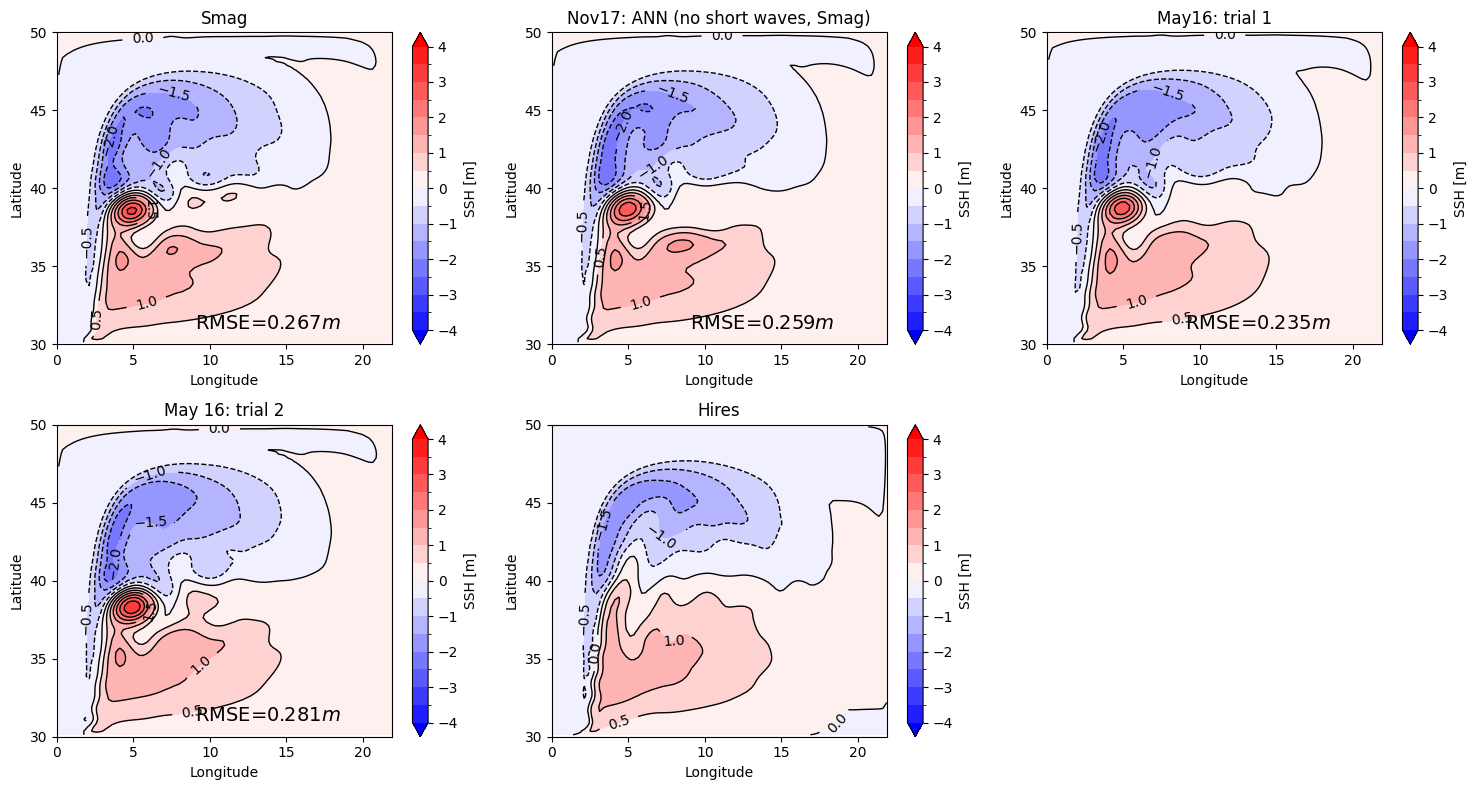

In [9]:
ds.plot_ssh(['R4', 'ANN_CM26-R4-ZB-1.0-Cs-0.06', 'reproduce_Nov17-EXP0', 'reproduce_Nov17-EXP1', 'R64_R4'], 
            ['Smag', 'Nov17: ANN (no short waves, Smag)', 'May16: trial 1', 'May 16: trial 2', 'Hires'])

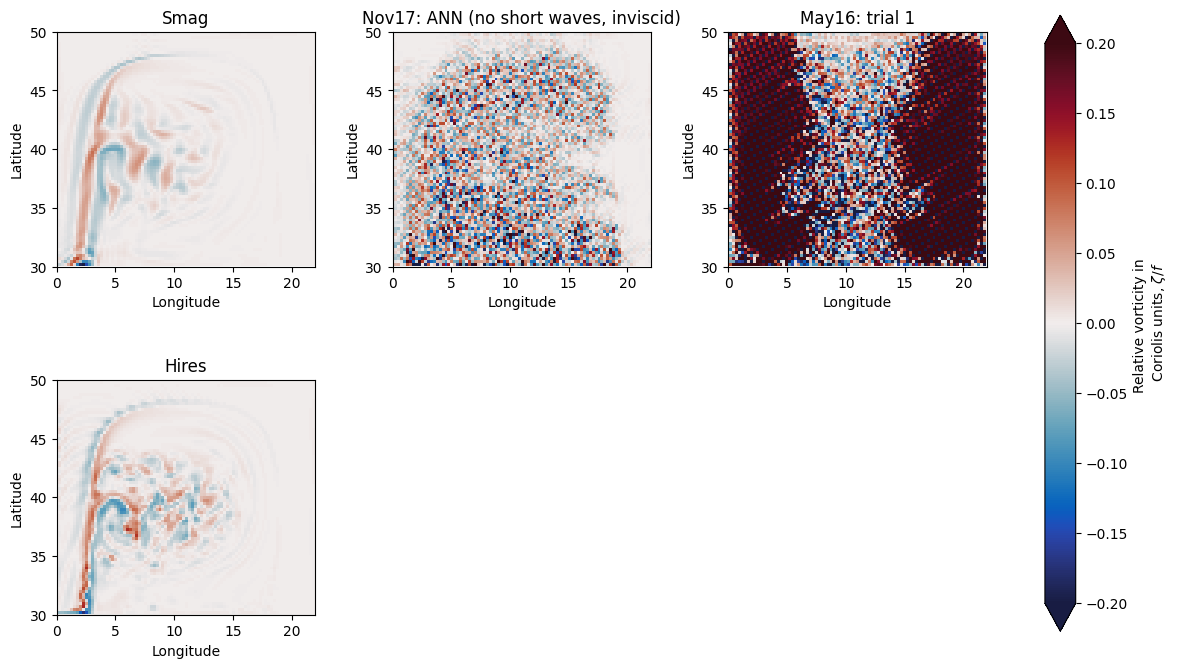

In [14]:
ds.plot_RV(['R4', 'ANN_CM26-R4-ZB-1.0-Cs-0.00', 'reproduce_Nov17-EXP0-inviscid', 'R64_R4'], 
            ['Smag', 'Nov17: ANN (no short waves, inviscid)', 'May16: trial 1', 'Hires'], idx=20)

# Models with constraints in short waves in INVISCID fluid

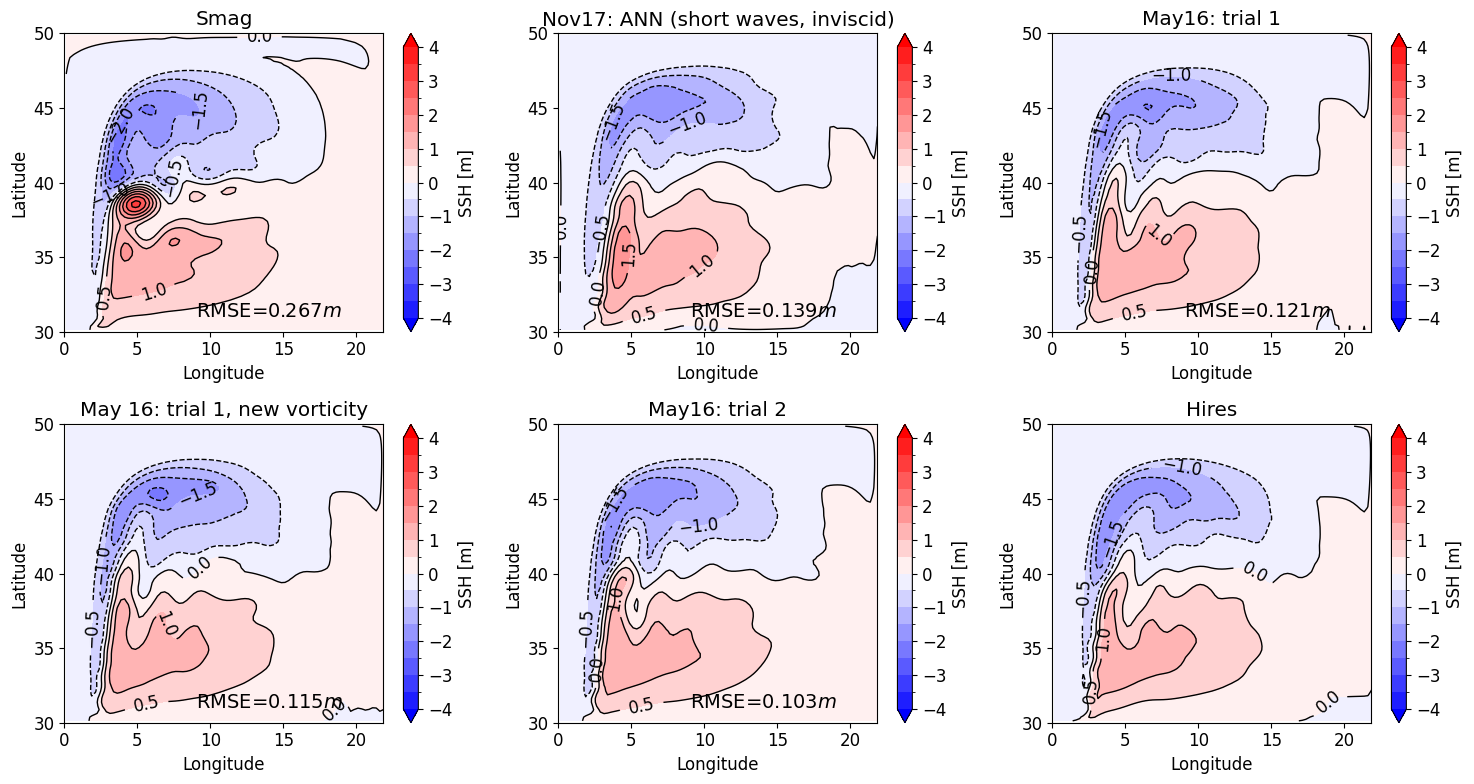

In [66]:
ds.plot_ssh(['R4', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-Cs-0.0', 'reproduce_Nov17-EXP2-inviscid', 'reproduce_Nov17-EXP2-inviscid-new-vorticity', 'reproduce_Nov17-EXP3-inviscid','R64_R4'], 
            ['Smag', 'Nov17: ANN (short waves, inviscid)', 'May16: trial 1', 'May 16: trial 1, new vorticity',  'May16: trial 2', 'Hires'])

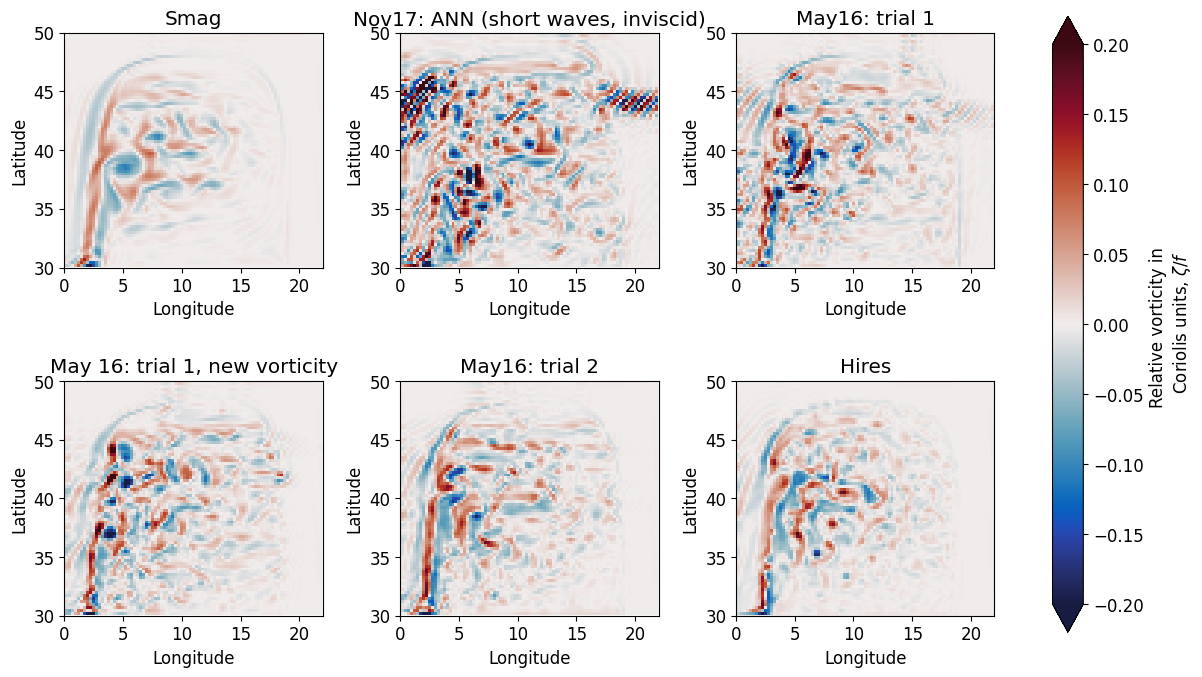

In [67]:
ds.plot_RV(['R4', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-Cs-0.0', 'reproduce_Nov17-EXP2-inviscid', 'reproduce_Nov17-EXP2-inviscid-new-vorticity', 'reproduce_Nov17-EXP3-inviscid','R64_R4'], 
            ['Smag', 'Nov17: ANN (short waves, inviscid)', 'May16: trial 1', 'May 16: trial 1, new vorticity',  'May16: trial 2', 'Hires'])

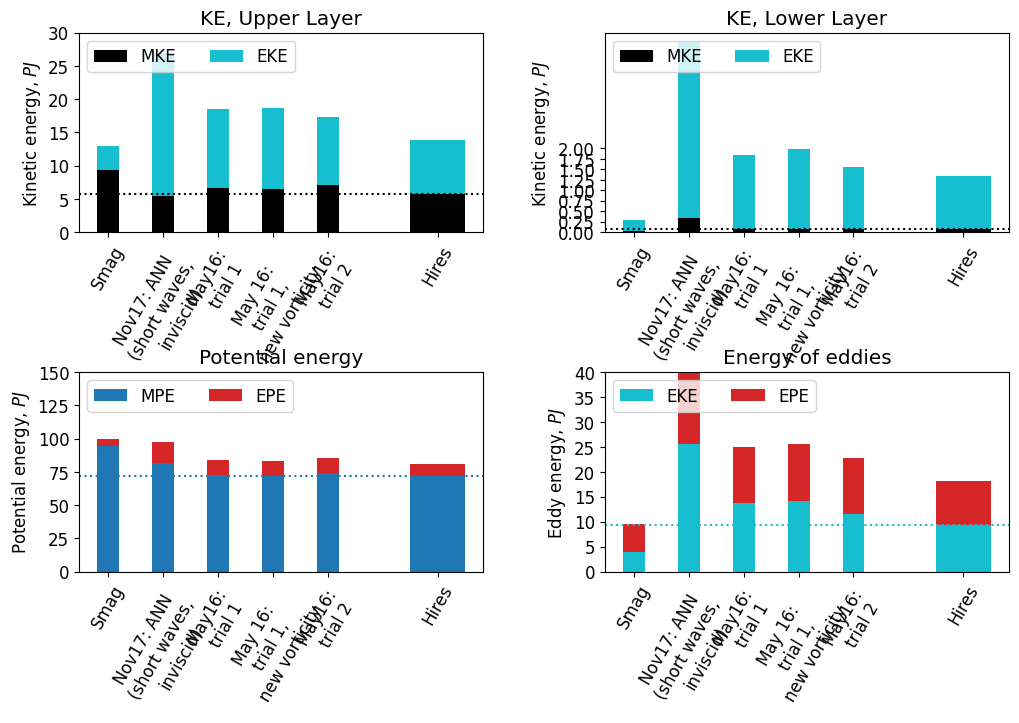

In [68]:
ds.plot_KE_PE(['R4', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-Cs-0.0', 'reproduce_Nov17-EXP2-inviscid', 'reproduce_Nov17-EXP2-inviscid-new-vorticity', 'reproduce_Nov17-EXP3-inviscid','R64_R4'], 
            ['Smag', 'Nov17: ANN \n(short waves, \ninviscid)', 'May16: \ntrial 1', 'May 16: \ntrial 1, \nnew vorticity',  'May16: \ntrial 2', 'Hires'], rotation=60)

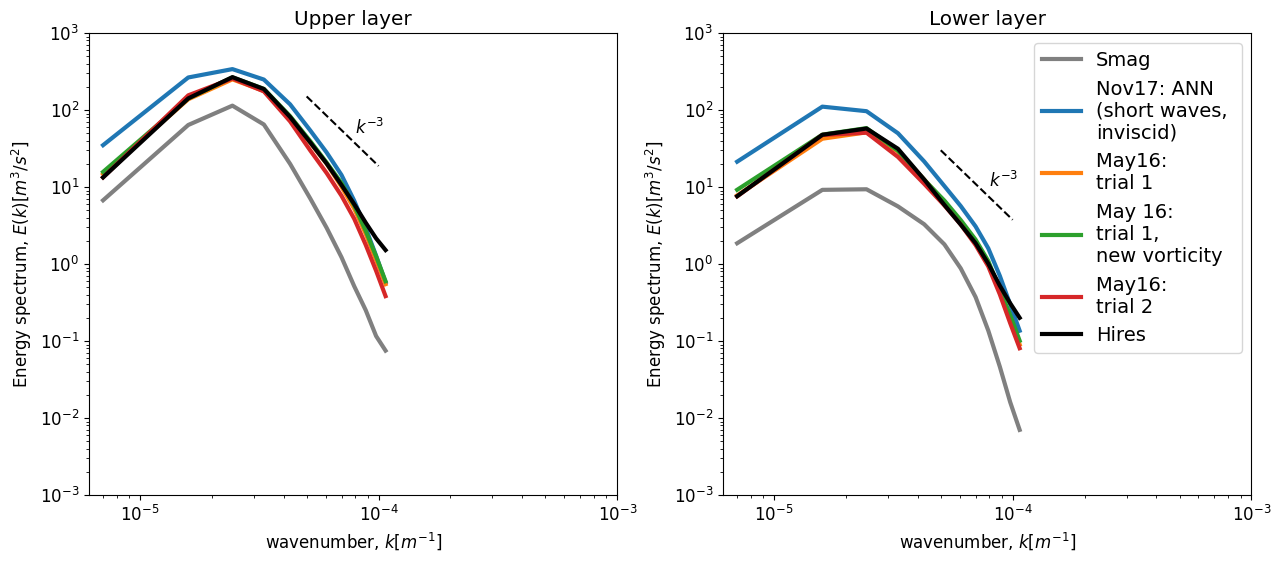

In [69]:
ds.plot_KE_spectrum(['R4', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-Cs-0.0', 'reproduce_Nov17-EXP2-inviscid', 'reproduce_Nov17-EXP2-inviscid-new-vorticity', 'reproduce_Nov17-EXP3-inviscid','R64_R4'], 
            ['Smag', 'Nov17: ANN \n(short waves, \ninviscid)', 'May16: \ntrial 1', 'May 16: \ntrial 1, \nnew vorticity',  'May16: \ntrial 2', 'Hires'])

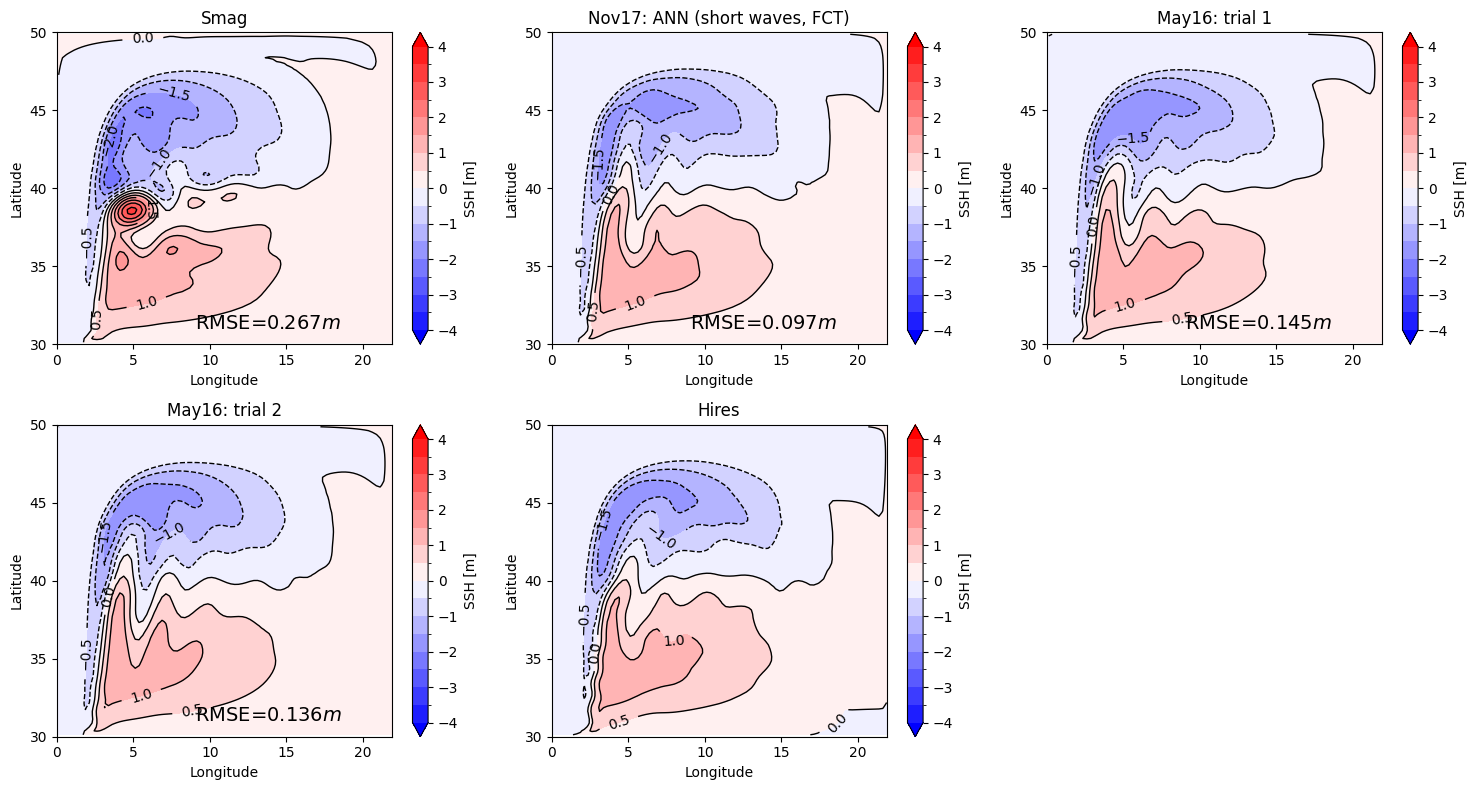

In [21]:
ds.plot_ssh(['R4', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-FCT-3', 'reproduce_Nov17-EXP2', 'reproduce_Nov17-EXP3', 'R64_R4'], 
            ['Smag', 'Nov17: ANN (short waves, FCT)', 'May16: trial 1',  'May16: trial 2', 'Hires'])

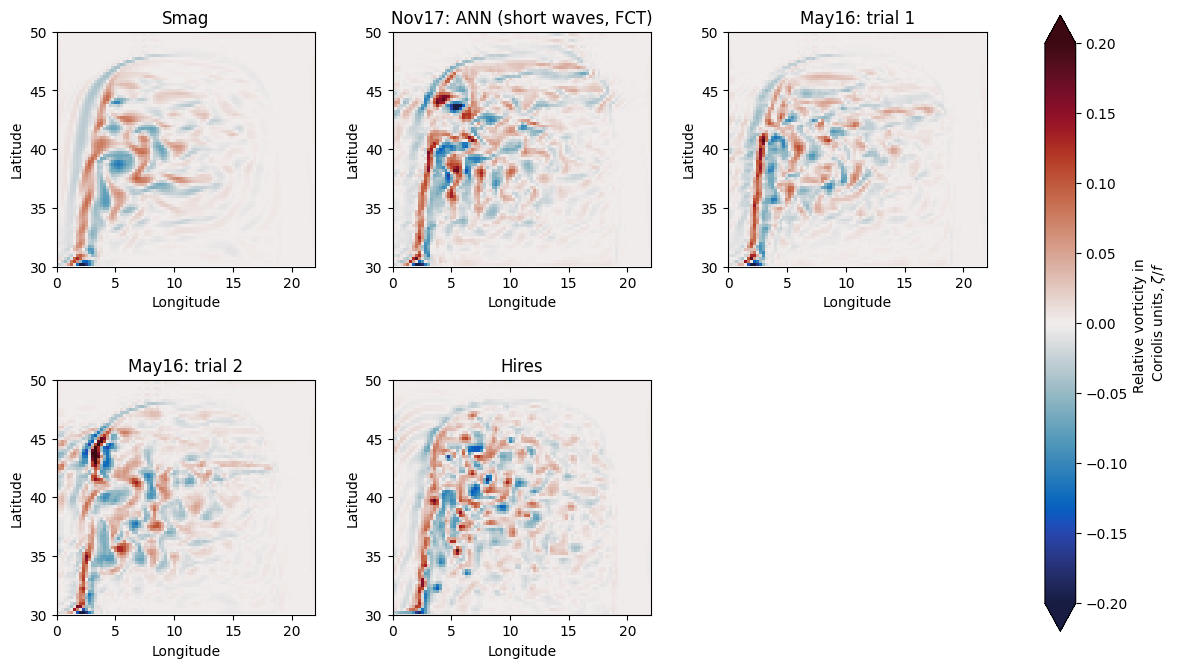

In [28]:
ds.plot_RV(['R4', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-FCT-3', 'reproduce_Nov17-EXP2', 'reproduce_Nov17-EXP3', 'R64_R4'], 
            ['Smag', 'Nov17: ANN (short waves, FCT)', 'May16: trial 1',  'May16: trial 2', 'Hires'], idx=150)

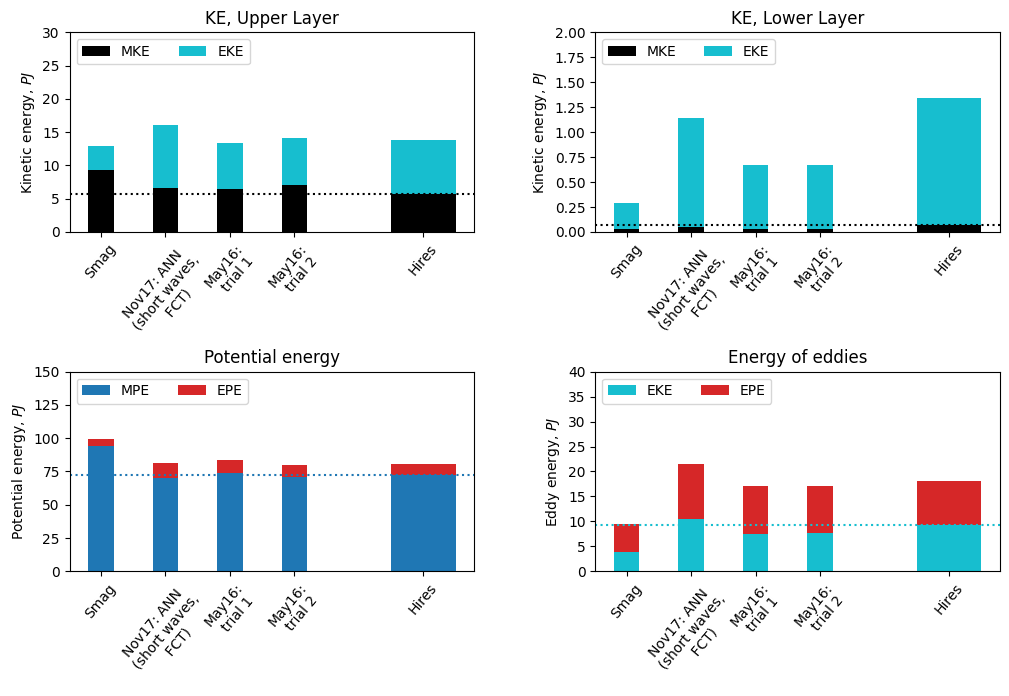

In [34]:
ds.plot_KE_PE(['R4', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-FCT-3', 'reproduce_Nov17-EXP2', 'reproduce_Nov17-EXP3', 'R64_R4'], 
            ['Smag', 'Nov17: ANN\n (short waves,\n FCT)', 'May16:\n trial 1',  'May16:\n trial 2', 'Hires'], rotation=50)

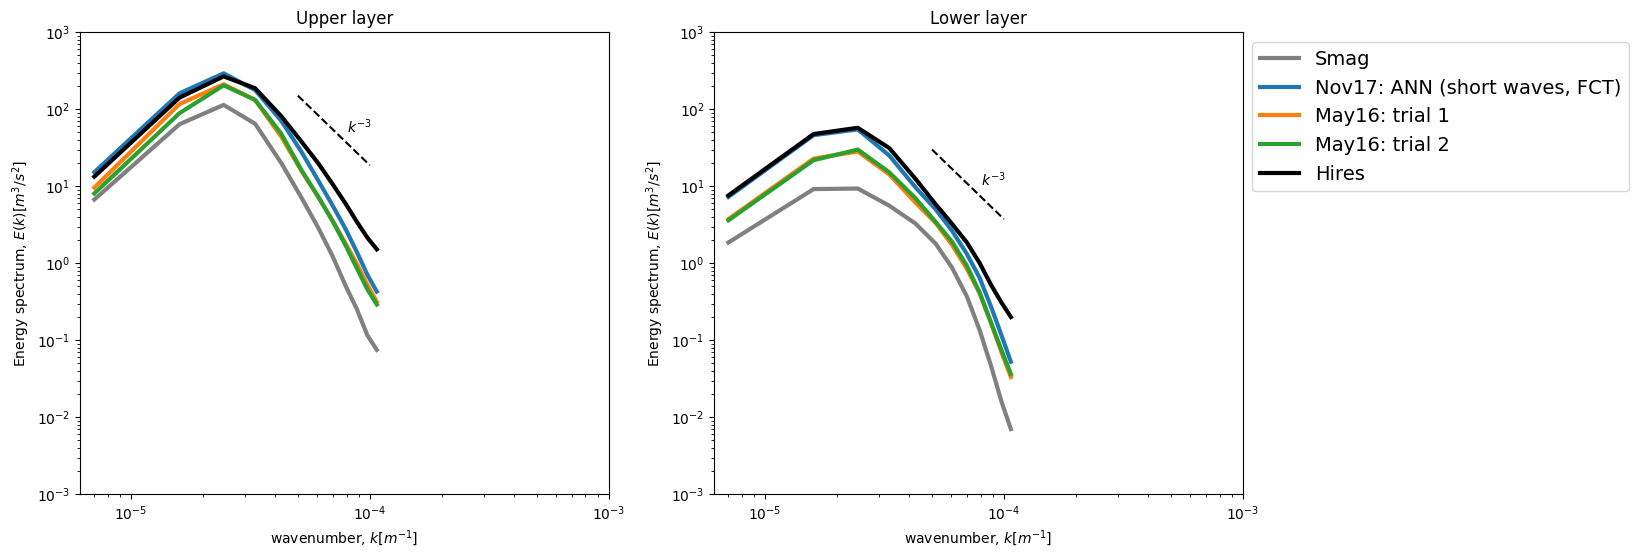

In [30]:
ds.plot_KE_spectrum(['R4', 'ANN_CM26_grid_harmonic_ver3-R4-ZB-1.0-FCT-3', 'reproduce_Nov17-EXP2', 'reproduce_Nov17-EXP3', 'R64_R4'], 
            ['Smag', 'Nov17: ANN (short waves, FCT)', 'May16: trial 1',  'May16: trial 2', 'Hires'])

In [51]:
from helpers.cm26 import read_datasets
ds = read_datasets(['test'], [4], 'subgrid', -1)['test-4']

Reading from folder /scratch/pp2681/mom6/CM26_datasets/ocean3d/subgrid/FGR-1/factor-4


In [98]:
ds0 = ds.select2d(zl=5)

In [99]:
from helpers.ann_tools import import_ANN
ann_Txy_nov17 = import_ANN('/home/pp2681/MOM6-examples/src/MOM6/experiments/ANN-Results/trained_models/ANN_CM26_grid_harmonic_ver3/Txy_epoch_1000.nc')
ann_Txx_Tyy_nov17 = import_ANN('/home/pp2681/MOM6-examples/src/MOM6/experiments/ANN-Results/trained_models/ANN_CM26_grid_harmonic_ver3/Txx_Tyy_epoch_1000.nc')

In [100]:
ann_Txy_may16 = import_ANN('/scratch/pp2681/mom6/CM26_ML_models/ocean3d/subgrid/FGR-1/EXP3/model/Txy.nc')
ann_Txx_Tyy_may16 = import_ANN('/scratch/pp2681/mom6/CM26_ML_models/ocean3d/subgrid/FGR-1/EXP3/model/Txx_Tyy.nc')

In [101]:
pred_nov17 = ds0.state.ANN(ann_Txy_nov17, ann_Txx_Tyy_nov17)

In [102]:
pred_may16 = ds0.state.ANN(ann_Txy_may16, ann_Txx_Tyy_may16)

Correlation: 0.931747703995329
Relative Error: 0.3638634956616796
R2 =  0.850160026834569
R2 max =  0.886303656323671
Optinal scaling: 0.8319875586997753
Nans [test/control]: [13219, 13219]


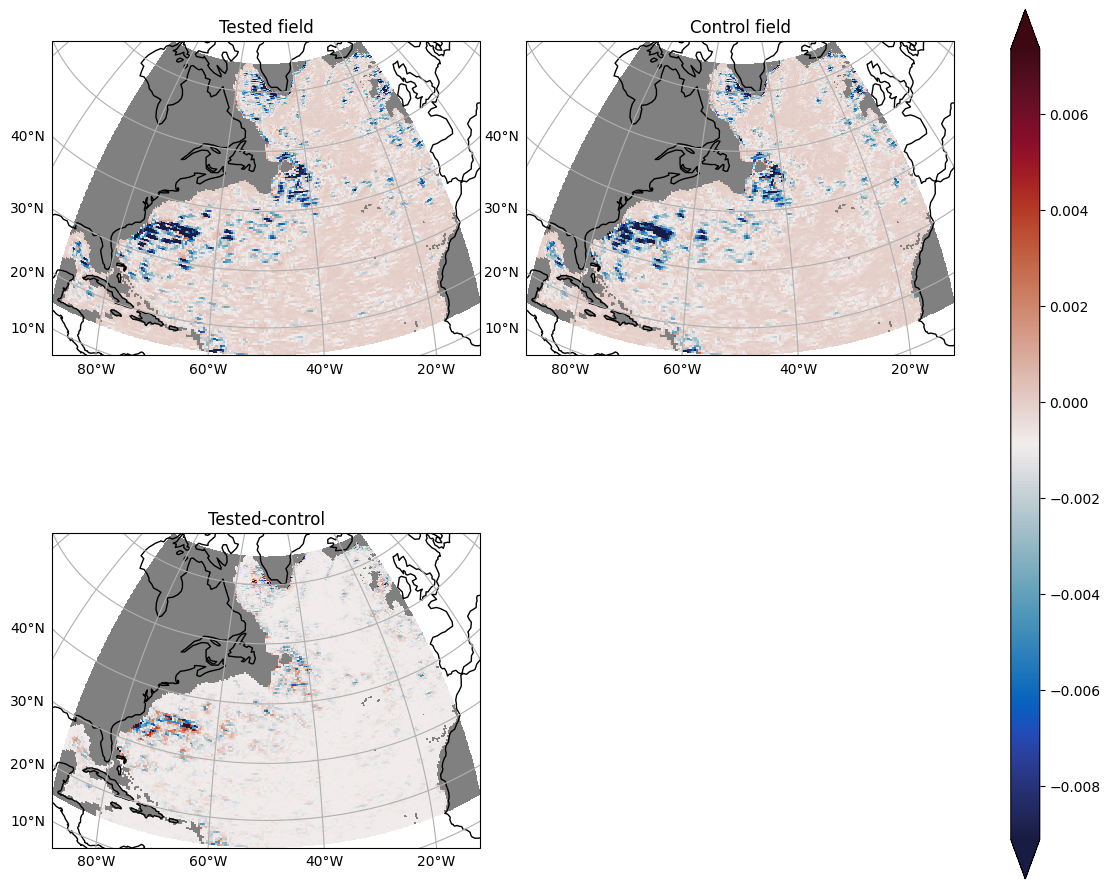

In [103]:
from helpers.selectors import *
compare(ds0.nanvar(pred_may16['Txx']), ds0.nanvar(pred_nov17['Txx']))

Correlation: 0.8443182781072235
Relative Error: 0.35846892173063494
R2 =  0.7444327846788819
R2 max =  0.7572080038304022
Optinal scaling: 0.8850417041537694
Nans [test/control]: [13219, 13219]


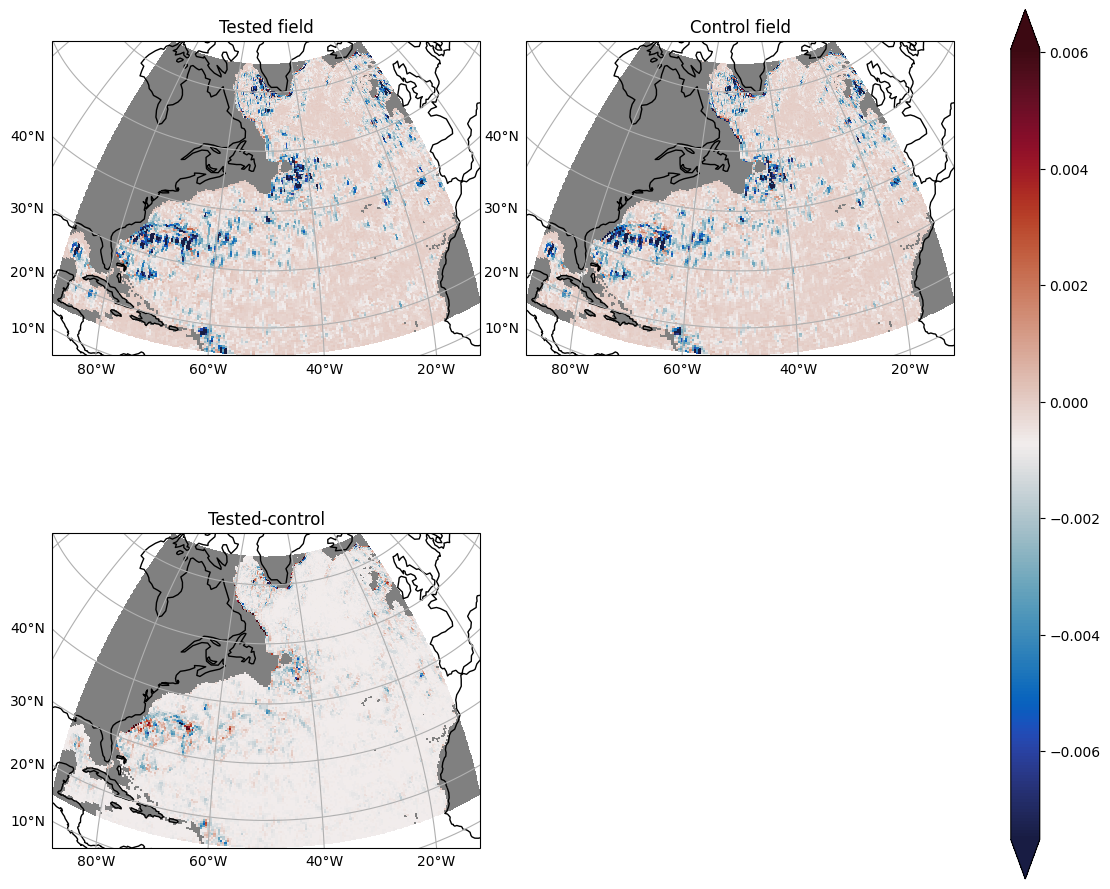

In [104]:
from helpers.selectors import compare
compare(ds0.nanvar(pred_may16['Tyy']), ds0.nanvar(pred_nov17['Tyy']))

Correlation: 0.945982008234293
Relative Error: 0.3449547603615943
R2 =  0.887321797543813
R2 max =  0.8949110653460771
Optinal scaling: 0.9156758876684371
Nans [test/control]: [13974, 13974]


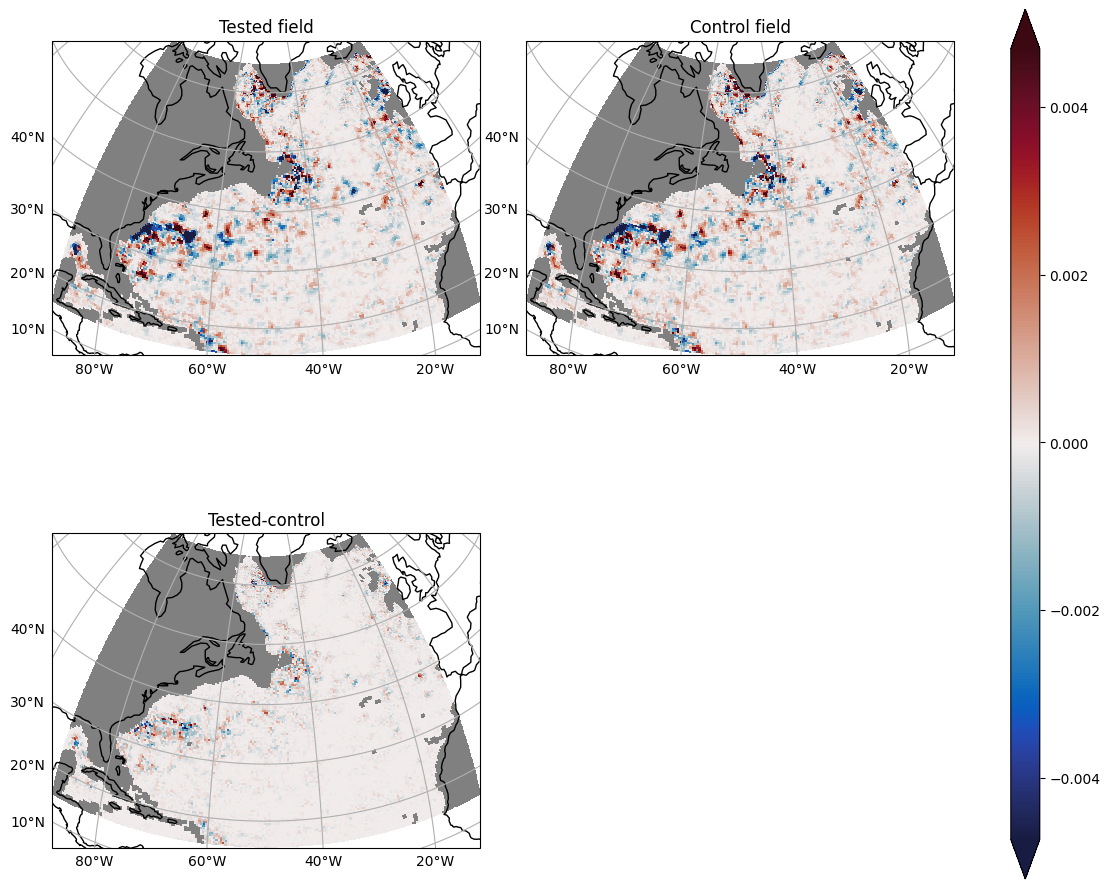

In [105]:
from helpers.selectors import compare
compare(ds0.nanvar(pred_may16['Txy']), ds0.nanvar(pred_nov17['Txy']))

Correlation: 0.8507019955722225
Relative Error: 0.46129654637046785
R2 =  0.7131768902783258
R2 max =  0.72363602860266
Optinal scaling: 0.8926793374820063
Nans [test/control]: [13524, 13524]


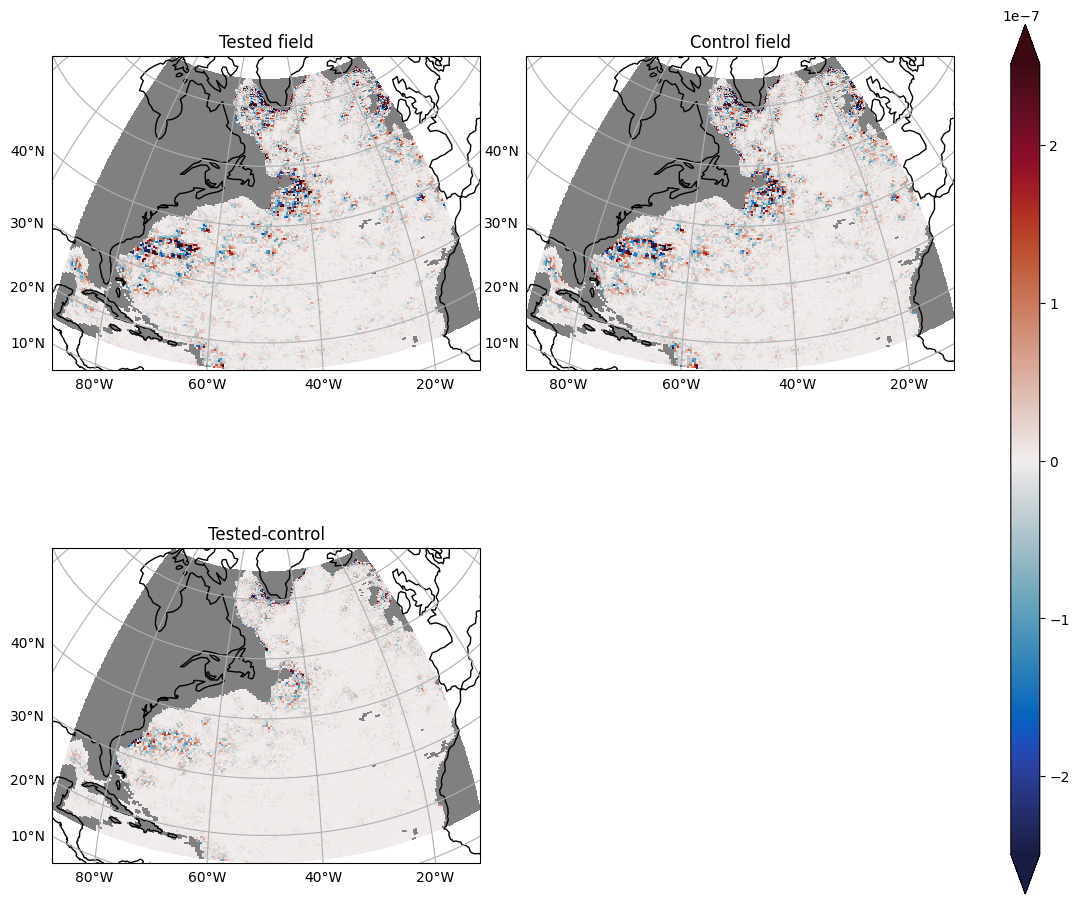

In [106]:
from helpers.selectors import compare
compare(ds0.nanvar(pred_may16['ZB20u']), ds0.nanvar(pred_nov17['ZB20u']))

Correlation: 0.8594070565919673
Relative Error: 0.49263784102622965
R2 =  0.7134070664891192
R2 max =  0.7385427856497886
Optinal scaling: 0.844249745189667
Nans [test/control]: [22092, 22092]


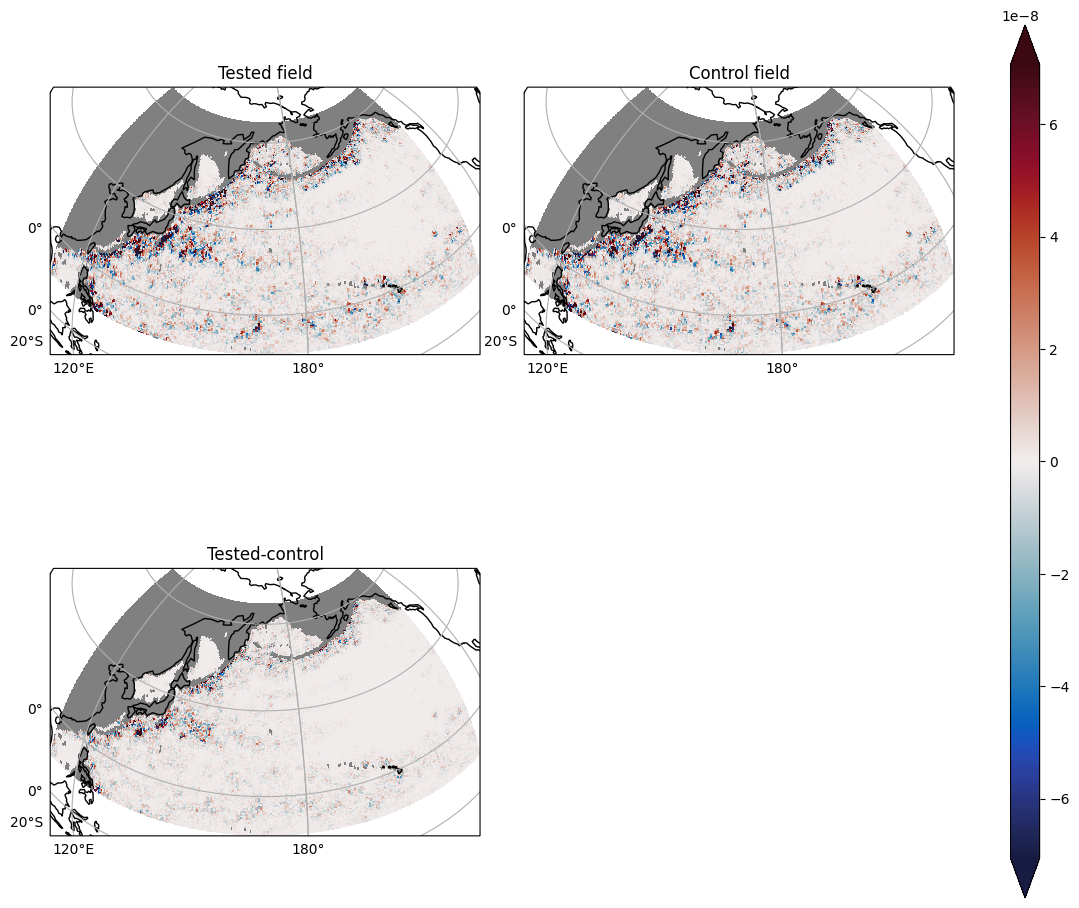

In [107]:
from helpers.selectors import compare
compare(ds0.nanvar(pred_may16['ZB20v']), ds0.nanvar(pred_nov17['ZB20v']), selector=select_Pacific)

Correlation: 0.8495645134786921
Relative Error: 0.4690049142582398
R2 =  0.702658831408572
R2 max =  0.7217628341588903
Optinal scaling: 0.860073354818223
Nans [test/control]: [12882, 12882]


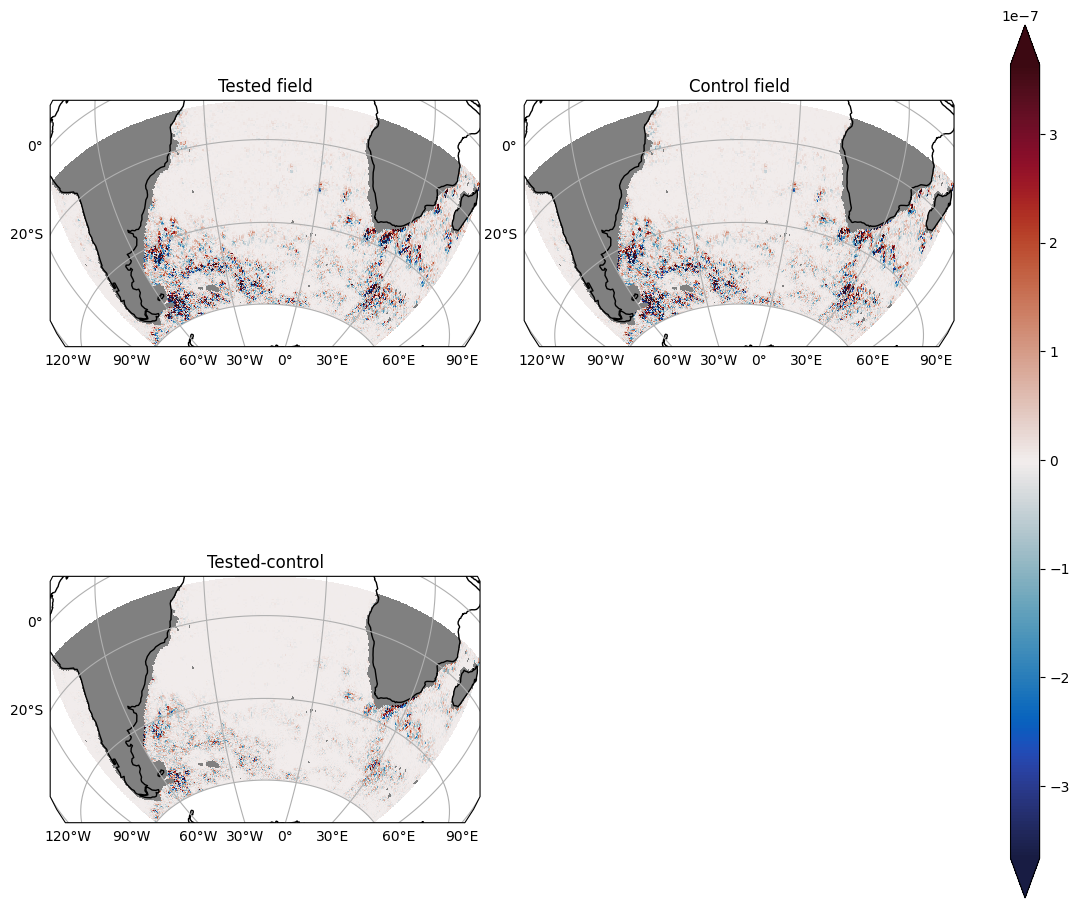

In [108]:
from helpers.selectors import compare
compare(ds0.nanvar(pred_may16['ZB20v']), ds0.nanvar(pred_nov17['ZB20v']), selector=select_rings)

# Spectra

In [6]:
def read_skill(exp='EXP0', factors=[4,9,12,15], base_path='/scratch/pp2681/mom6/CM26_ML_models/ocean3d/'):
    ds = {}
    for factor in factors:
        data = xr.open_dataset(f'{base_path}/{exp}/skill-test/factor-{factor}.nc', chunks={'zl':1})
        data['zl'] = -data['zl']
        ds[factor] = data
        
    return ds

In [3]:
def backscatter_ratio(transfer, freq_str):
    transfer_noncompensated = transfer / transfer[freq_str]
    transfer_plus = np.maximum(transfer_noncompensated,0.0)
    transfer_minus =  np.minimum(transfer_noncompensated,0.0)
    return -transfer_plus.sum(freq_str) / transfer_minus.sum(freq_str)

In [4]:
def plot_transfer(transfer, freq_str='freq_r_NA', zl=0, color='tab:blue'):
    mean = transfer.mean('time').isel(zl=zl)
    std = transfer.std('time').isel(zl=zl)
    
    mean.plot(xscale='log',color=color,lw=2)
    plt.fill_between(mean[freq_str],mean-std,mean+std,alpha=0.05,color=color, linewidth=0)
    return backscatter_ratio(mean,freq_str)

In [5]:
def plot_transfer_4_regions(exps=[],zl=5,factor=4,labels=[]):
    plt.figure(figsize=(10,8))
    plt.rcParams['font.size']=12

    colors= ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:pink']
    
    plt.subplot(2,2,1)
    ratio = plot_transfer(exps[0][factor].transfer_NA,'freq_r_NA',color='k',zl=zl)
    for exp, color in zip(exps, colors):
        plot_transfer(exp[factor].transfer_ZB_NA,'freq_r_NA',zl=zl,color=color)
    plt.ylabel('Compensated energy transfer m$^2$/s$^3$')
    plt.title('North Atlantic')
    plt.axhline(y=0,color='gray')
    plt.xlabel('Wavenumber, m$^{-1}$')
    plt.axvline(x=1/(22.6e+3), color='tab:gray', ls='--')
    plt.xlim([1e-6,2e-4])
    plt.text(1e-5, 0, 'Backscat ratio: %.1f' % float(ratio))

    plt.subplot(2,2,2)
    ratio=plot_transfer(exps[0][factor].transfer_Pacific,'freq_r_Pacific',color='k',zl=zl)
    for exp, color in zip(exps,colors):
        plot_transfer(exp[factor].transfer_ZB_Pacific,'freq_r_Pacific',zl=zl,color=color)
    plt.ylabel('Compensated energy transfer m$^2$/s$^3$')
    plt.title('Pacific')
    plt.axhline(y=0,color='gray')
    plt.xlabel('Wavenumber, m$^{-1}$')
    plt.axvline(x=1/(28.5e+3), color='tab:gray', ls='--')
    plt.xlim([1e-6,2e-4])
    plt.text(1e-5, 0, 'Backscat ratio: %.1f' % float(ratio))
    
    plt.subplot(2,2,3)
    ratio=plot_transfer(exps[0][factor].transfer_ACC,'freq_r_ACC',color='k',zl=zl)
    for exp,color in zip(exps,colors):
        plot_transfer(exp[factor].transfer_ZB_ACC,'freq_r_ACC',zl=zl,color=color)
    plt.ylabel('Compensated energy transfer m$^2$/s$^3$')
    plt.title('ACC')
    plt.axhline(y=0,color='gray')
    plt.xlabel('Wavenumber, m$^{-1}$')
    plt.axvline(x=1/(10.5e+3), color='tab:gray',ls='--')
    plt.xlim([1e-6,2e-4])
    plt.text(1e-5, 0, 'Backscat ratio: %.1f' % float(ratio))
        
    plt.subplot(2,2,4)
    ratio=plot_transfer(exps[0][factor].transfer_Equator,'freq_r_Equator',color='k',zl=zl)
    for exp,color in zip(exps,colors):
        plot_transfer(exp[factor].transfer_ZB_Equator,'freq_r_Equator',zl=zl,color=color)
    plt.ylabel('Compensated energy transfer m$^2$/s$^3$')
    plt.title('Equator')
    plt.axhline(y=0,color='gray')
    plt.xlabel('Wavenumber, m$^{-1}$')
    plt.tight_layout()
    plt.axvline(x=1/(89.9e+3), color='tab:gray',ls='--')
    plt.xlim([1e-6,2e-4])
    plt.text(1e-5, 0, 'Backscat ratio: %.1f' % float(ratio))
    
    plt.plot(np.nan,np.nan,color='k',label='SFS')
    for label, color in zip(labels,colors):
        plt.plot(np.nan,np.nan,color=color,label=label)
    plt.plot(np.nan,np.nan,color='gray',ls='--',label='$1/R_d$')
    plt.legend(bbox_to_anchor=(1,1))
    
    plt.suptitle(f'Coarsegraining factor: {factor}, Depth: %.0f m' % (float(-exp[factor].zl[zl])), y=1.03)

In [18]:
import cmocean
def plot_metric(exp0=None, metric='R2',vmin=0,vmax=1):
    exp = xr.concat([exp0[factor] for factor in [4,9,12,15]], dim='factor')
    exp['factor'] = [4,9,12,15]
    exp[metric].drop_vars(['zl','factor']).plot(x='factor', y='zl',cmap=cmocean.cm.balance, vmin=vmin, vmax=vmax, cbar_kwargs={'label':''})
    plt.yticks(np.arange(10),[5, 55, 110, 180,330, 730,1500,2500,3500,4500]);
    plt.ylabel('Depth, m')
    plt.xticks(np.arange(4),[4,9,12,15]);
    if metric == 'R2':
        title_str = '$R^2$'
    elif metric == 'corr':
        title_str = 'Correlation'
    elif metric == 'opt_scaling':
        title_str = 'Optimal scaling'
    
    mean_val = float(exp[metric].mean())
    std_val = float(exp[metric].std())
    plt.title(metric+'\n [mean/std]=[%.3f,%.3f]' % (mean_val,std_val))
    
    plt.xlabel('Coarsegraining factor')
    plt.gca().invert_yaxis()

In [10]:
nov15 = read_skill('Nov15-FGR-1', base_path='offline-skill-old-models')
nov17 = read_skill('Nov17-FGR-1', base_path='offline-skill-old-models')

In [12]:
exp0 = read_skill('subgrid/FGR-1/EXP0')
exp1 = read_skill('subgrid/FGR-1/EXP1')
exp2 = read_skill('subgrid/FGR-1/EXP2')
exp3 = read_skill('subgrid/FGR-1/EXP3')

## Unconstrained models 

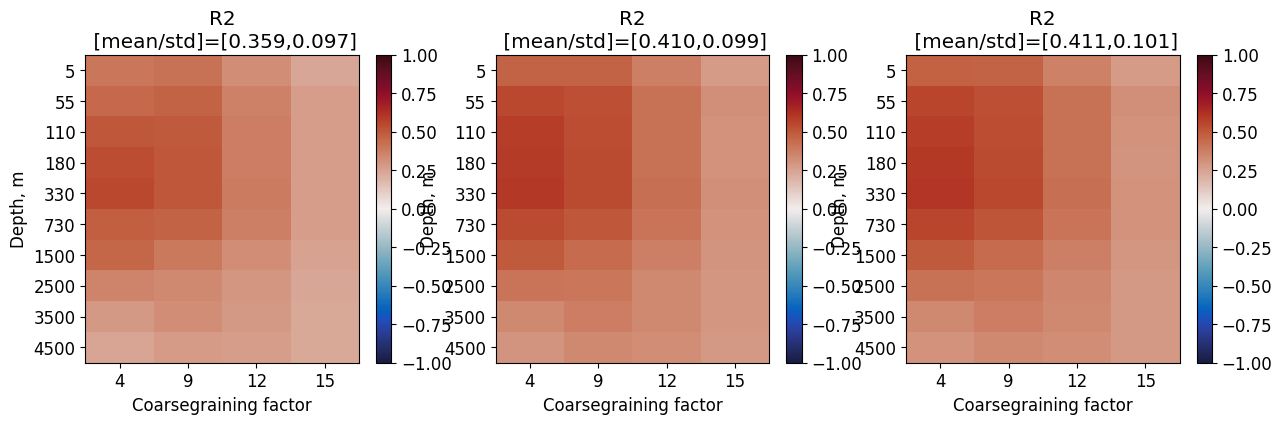

In [39]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plot_metric(nov15, 'R2', vmin=-1); 

plt.subplot(1,3,2)
plot_metric(exp0, 'R2', vmin=-1); 

plt.subplot(1,3,3)
plot_metric(exp1, 'R2', vmin=-1); 

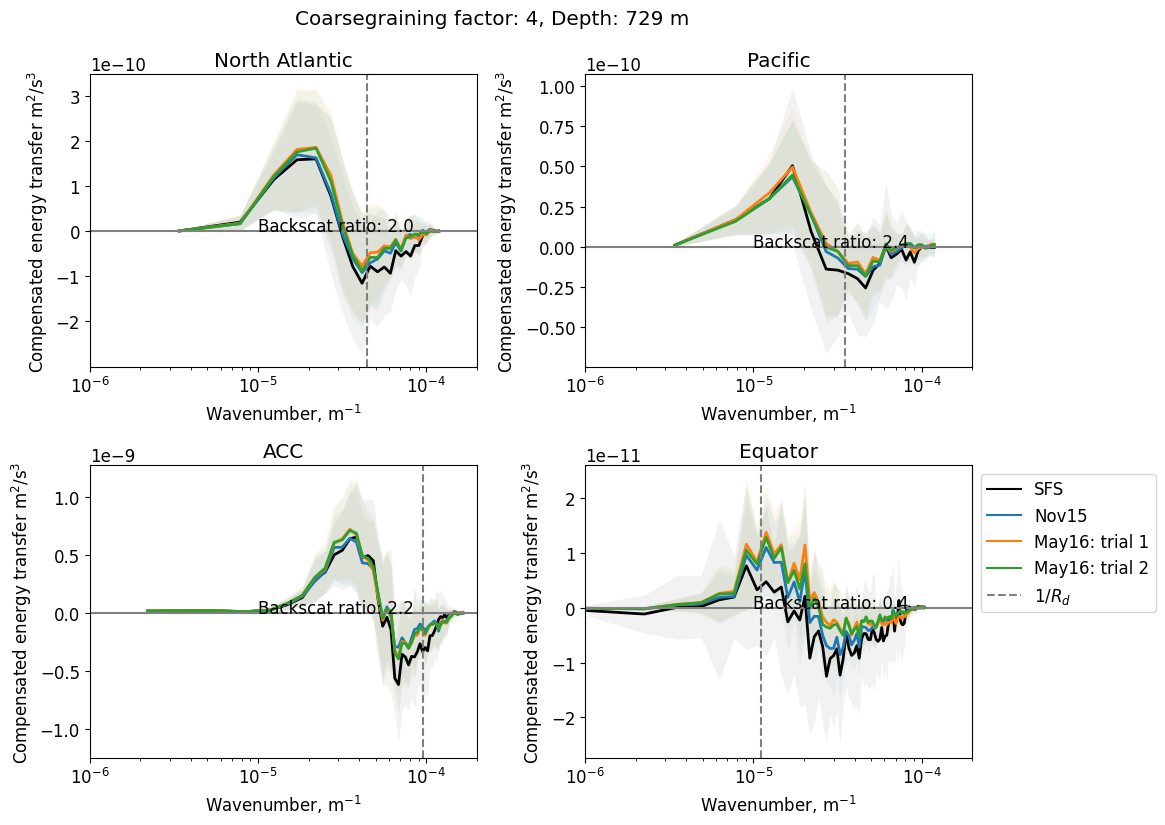

In [34]:
plot_transfer_4_regions(exps=[nov15, exp0, exp1], labels=['Nov15', 'May16: trial 1', 'May16: trial 2'])

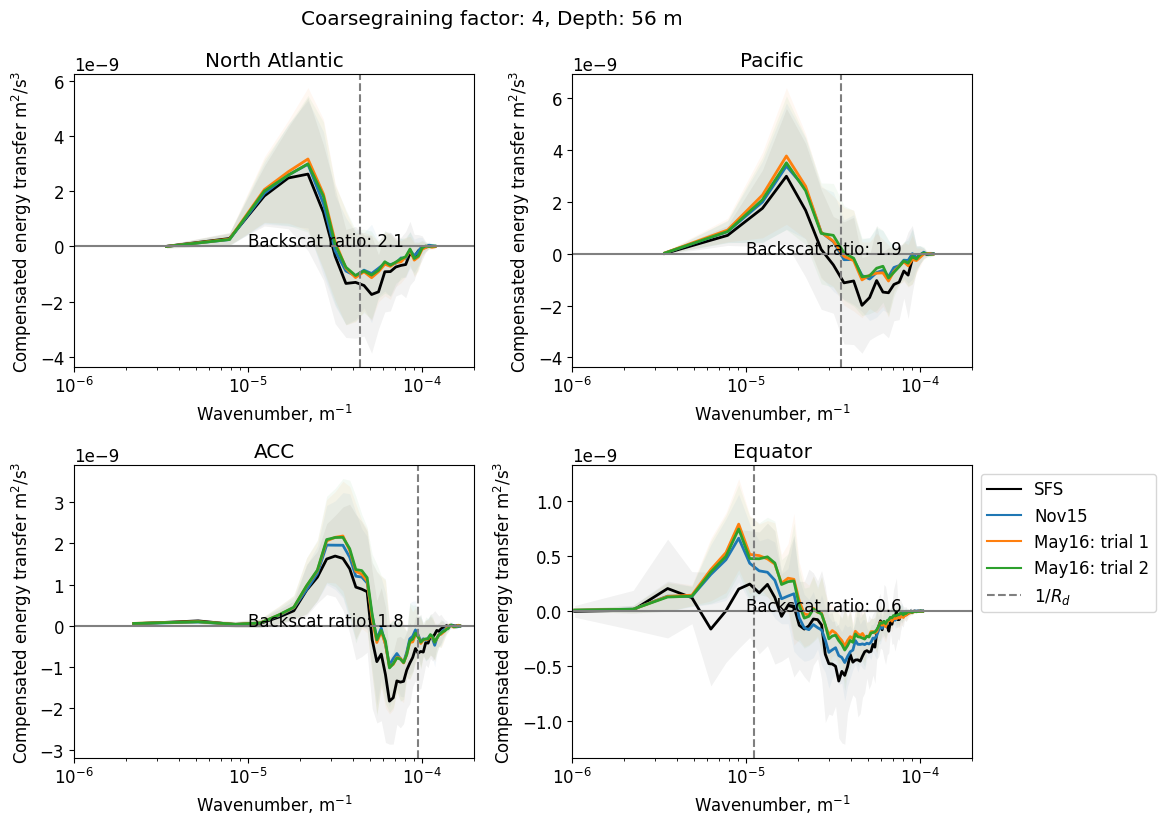

In [36]:
plot_transfer_4_regions(exps=[nov15, exp0, exp1], labels=['Nov15', 'May16: trial 1', 'May16: trial 2'], zl=1)

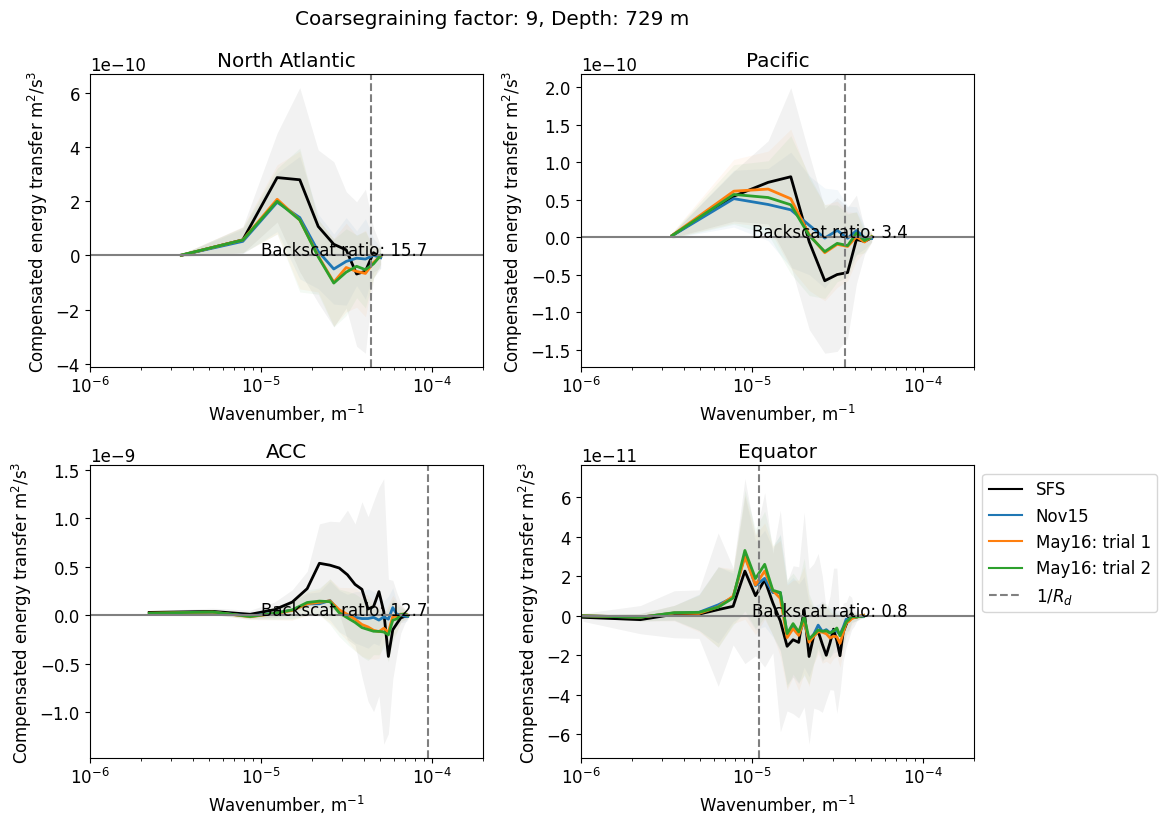

In [37]:
plot_transfer_4_regions(exps=[nov15, exp0, exp1], labels=['Nov15', 'May16: trial 1', 'May16: trial 2'], factor=9)

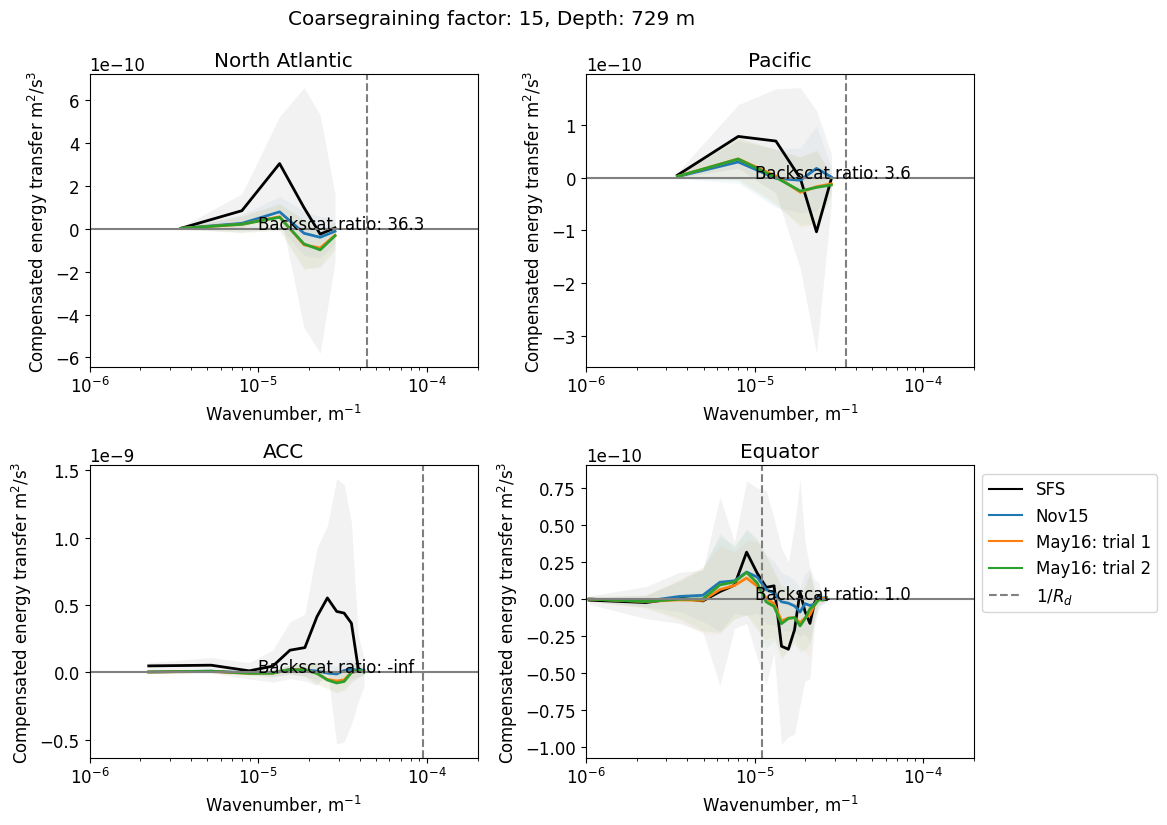

In [38]:
plot_transfer_4_regions(exps=[nov15, exp0, exp1], labels=['Nov15', 'May16: trial 1', 'May16: trial 2'], factor=15)

## Constrained models

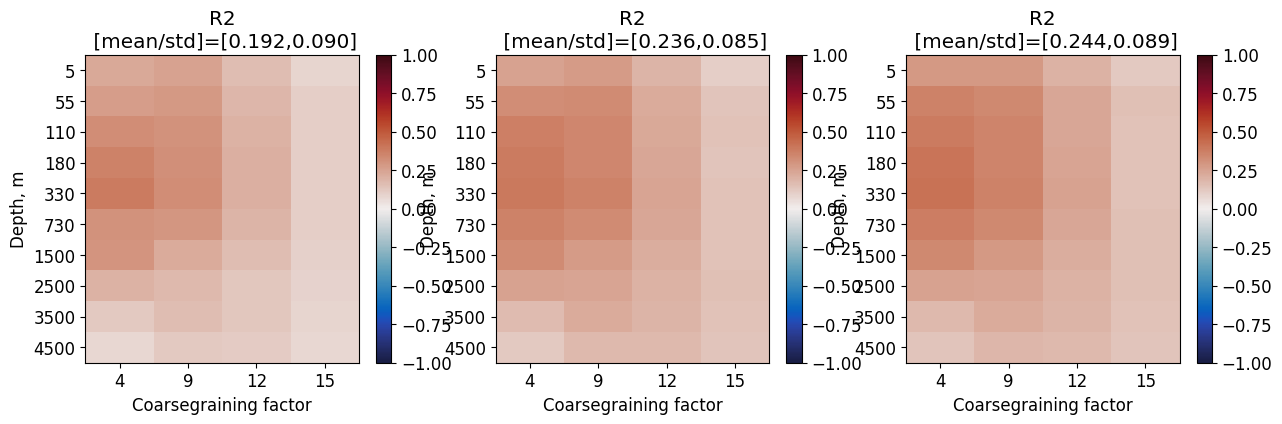

In [40]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plot_metric(nov17, 'R2', vmin=-1); 

plt.subplot(1,3,2)
plot_metric(exp2, 'R2', vmin=-1); 

plt.subplot(1,3,3)
plot_metric(exp3, 'R2', vmin=-1); 

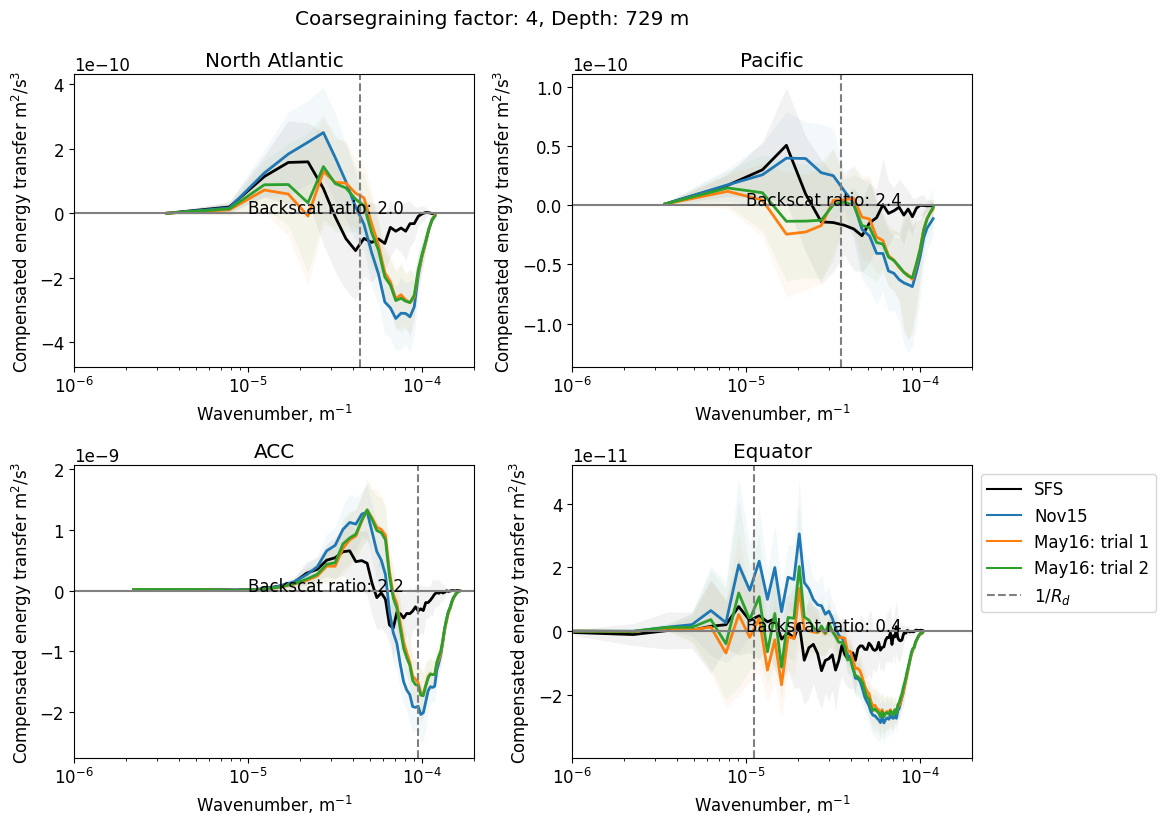

In [41]:
plot_transfer_4_regions(exps=[nov17, exp2, exp3], labels=['Nov15', 'May16: trial 1', 'May16: trial 2'])

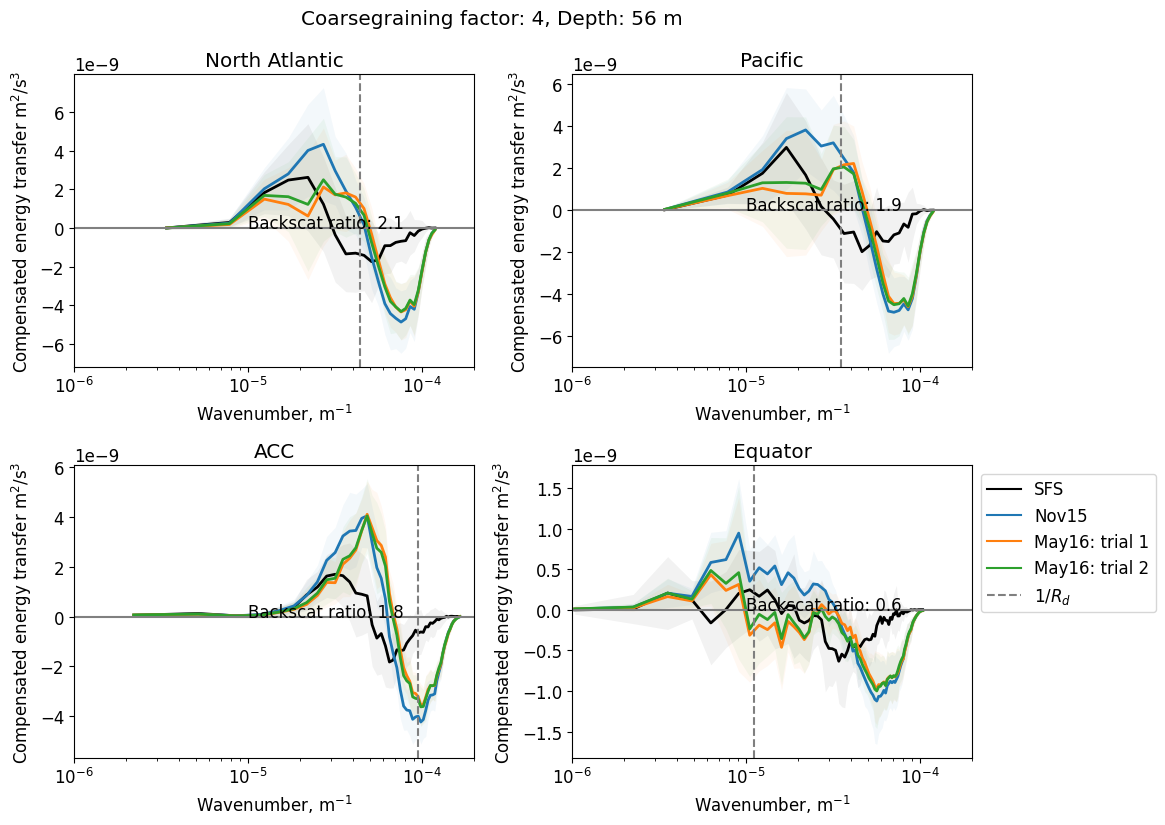

In [42]:
plot_transfer_4_regions(exps=[nov17, exp2, exp3], labels=['Nov15', 'May16: trial 1', 'May16: trial 2'], zl=1)

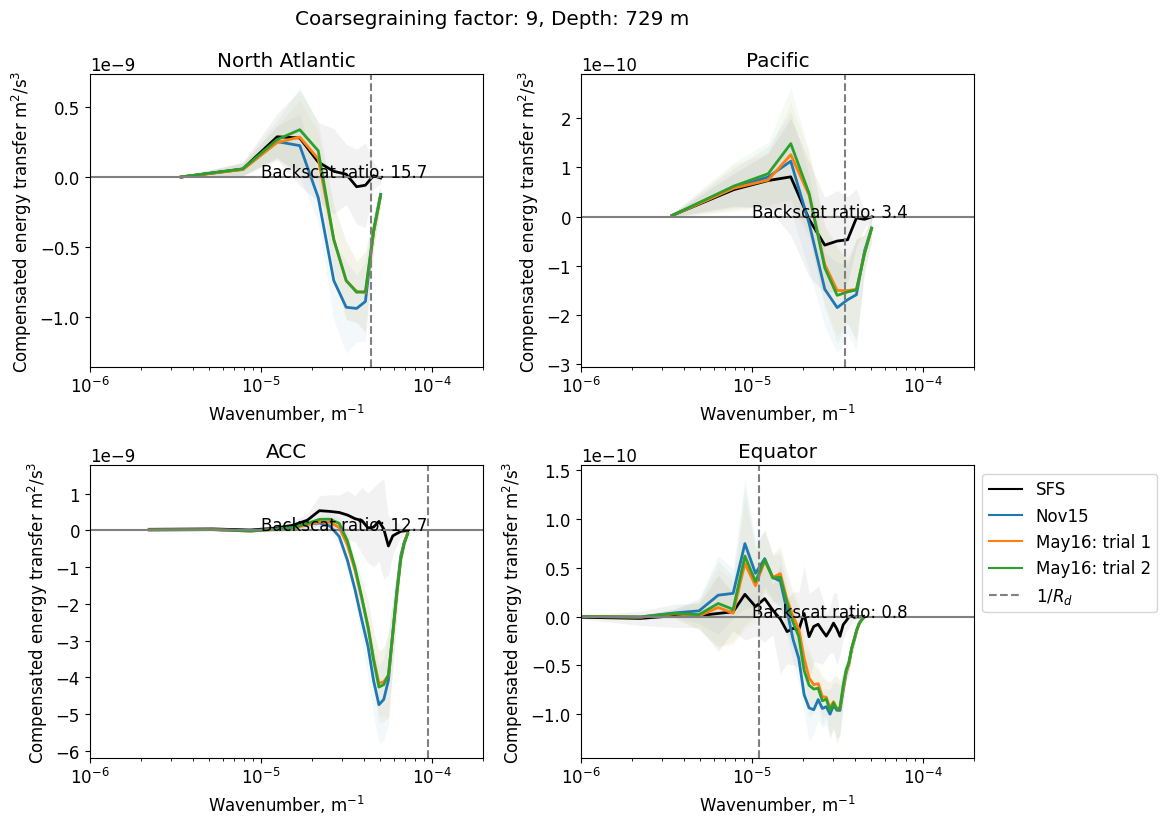

In [43]:
plot_transfer_4_regions(exps=[nov17, exp2, exp3], labels=['Nov15', 'May16: trial 1', 'May16: trial 2'], factor=9)

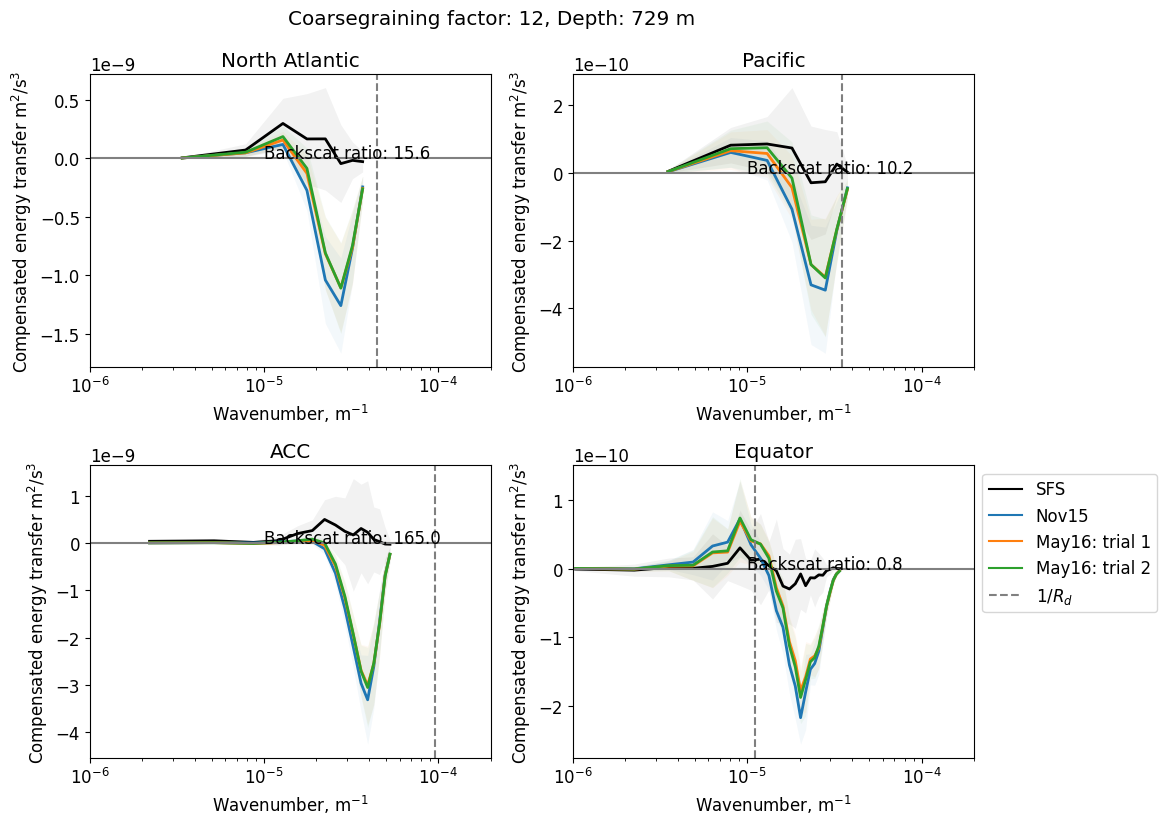

In [44]:
plot_transfer_4_regions(exps=[nov17, exp2, exp3], labels=['Nov15', 'May16: trial 1', 'May16: trial 2'], factor=12)

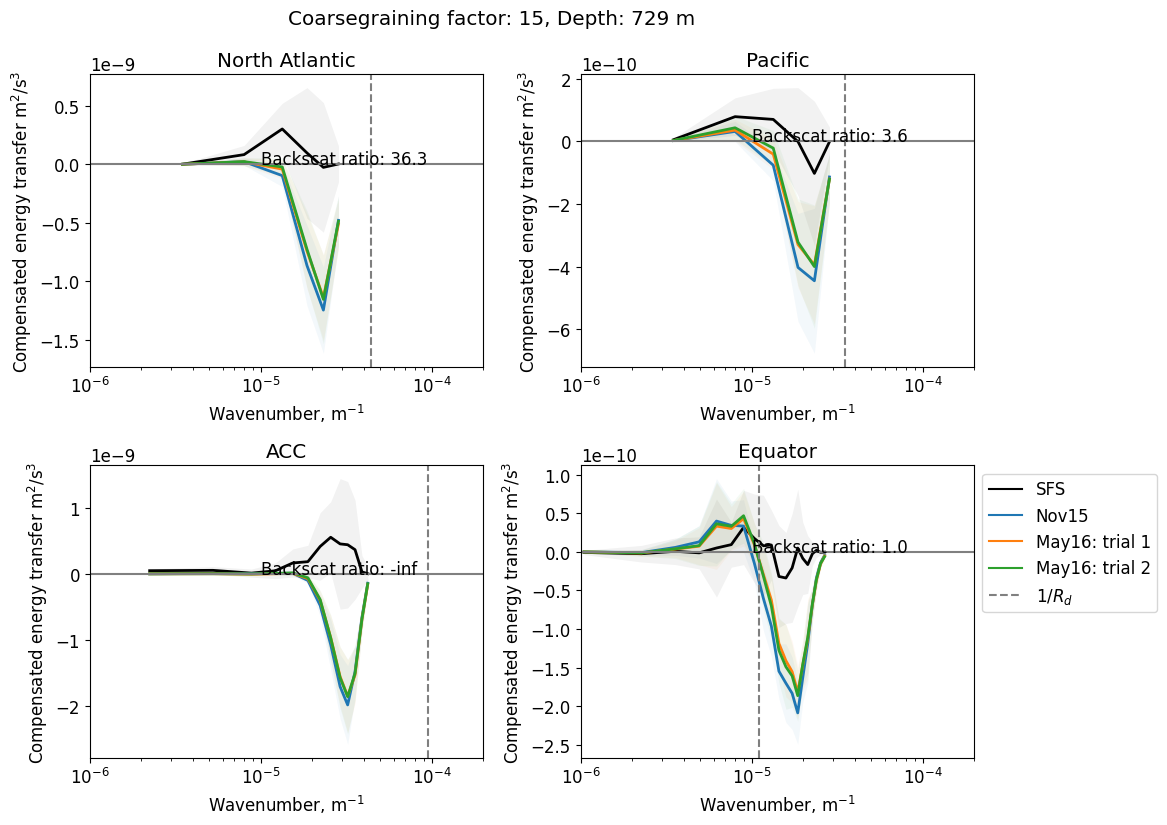

In [45]:
plot_transfer_4_regions(exps=[nov17, exp2, exp3], labels=['Nov15', 'May16: trial 1', 'May16: trial 2'], factor=15)

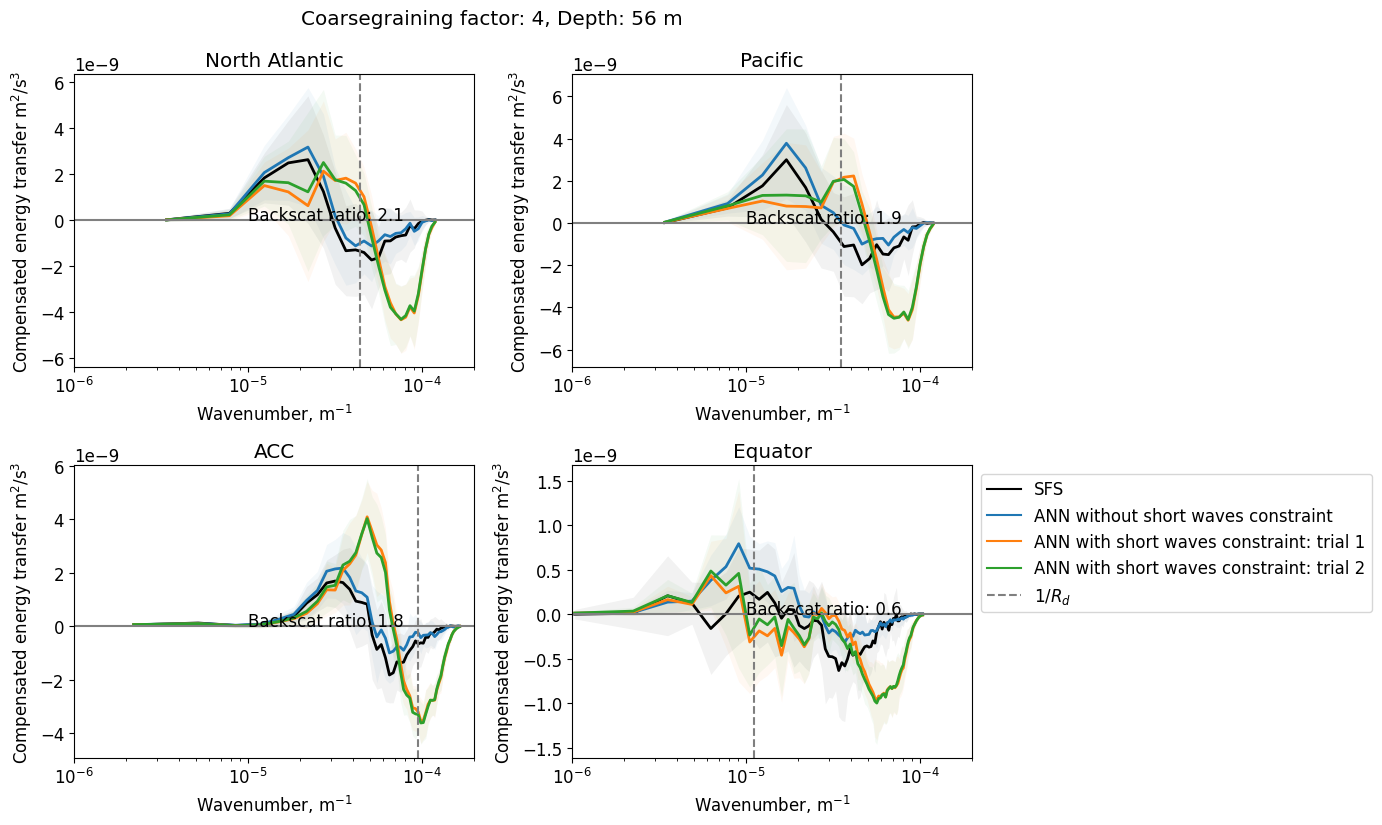

In [53]:
plot_transfer_4_regions(exps=[exp0, exp2, exp3], labels=['ANN without short waves constraint', 'ANN with short waves constraint: trial 1', 'ANN with short waves constraint: trial 2'], zl=1, factor=4)